### Vehicle Performance Prediction


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
x=pd.read_csv("C:/Users/admin/Desktop/Imarticus/Vehicle Performance Prediction/Dataset/Data.csv")
df=pd.DataFrame(x)
df

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443
...,...,...,...,...,...,...,...,...,...
393,1,4,140.0,86,2790,15.6,1982,ford mustang gl,11.478880
394,2,4,97.0,52,2130,24.6,1982,vw pickup,18.706323
395,1,4,135.0,84,2295,11.6,1982,dodge rampage,13.604599
396,1,4,120.0,79,2625,18.6,1982,ford ranger,11.904024


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   origin               398 non-null    int64  
 1   cylinders            398 non-null    int64  
 2   displacement         398 non-null    float64
 3   horsepower           398 non-null    object 
 4   weight               398 non-null    int64  
 5   acceleration         398 non-null    float64
 6   year                 398 non-null    int64  
 7   name                 398 non-null    object 
 8   Kilometer_per_liter  398 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [7]:
df.shape

(398, 9)

In [11]:
df.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')

In [12]:
df.describe()

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,1.572864,5.454774,193.425879,2970.424623,15.568090,1976.010050,9.997073
std,0.802055,1.701004,104.269838,846.841774,2.757689,3.697627,3.322917
min,1.000000,3.000000,68.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,104.250000,2223.750000,13.825000,1973.000000,7.440015
50%,1.000000,4.000000,148.500000,2803.500000,15.500000,1976.000000,9.778305
75%,2.000000,8.000000,262.000000,3608.000000,17.175000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,5140.000000,24.800000,1982.000000,19.811697


In [13]:
df.isnull().sum()

origin                 0
cylinders              0
displacement           0
horsepower             0
weight                 0
acceleration           0
year                   0
name                   0
Kilometer_per_liter    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [17]:
import seaborn as sns
corr=df.corr()
corr

,origin,cylinders,displacement,weight,acceleration,year,Kilometer_per_liter
origin,1.000000,-0.562543,-0.609409,-0.581024,0.205873,0.180662,0.563450
cylinders,-0.562543,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.775396
displacement,-0.609409,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.804203
weight,-0.581024,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.831741
acceleration,0.205873,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.420289
year,0.180662,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.579267
Kilometer_per_liter,0.563450,-0.775396,-0.804203,-0.831741,0.420289,0.579267,1.000000


<AxesSubplot:>

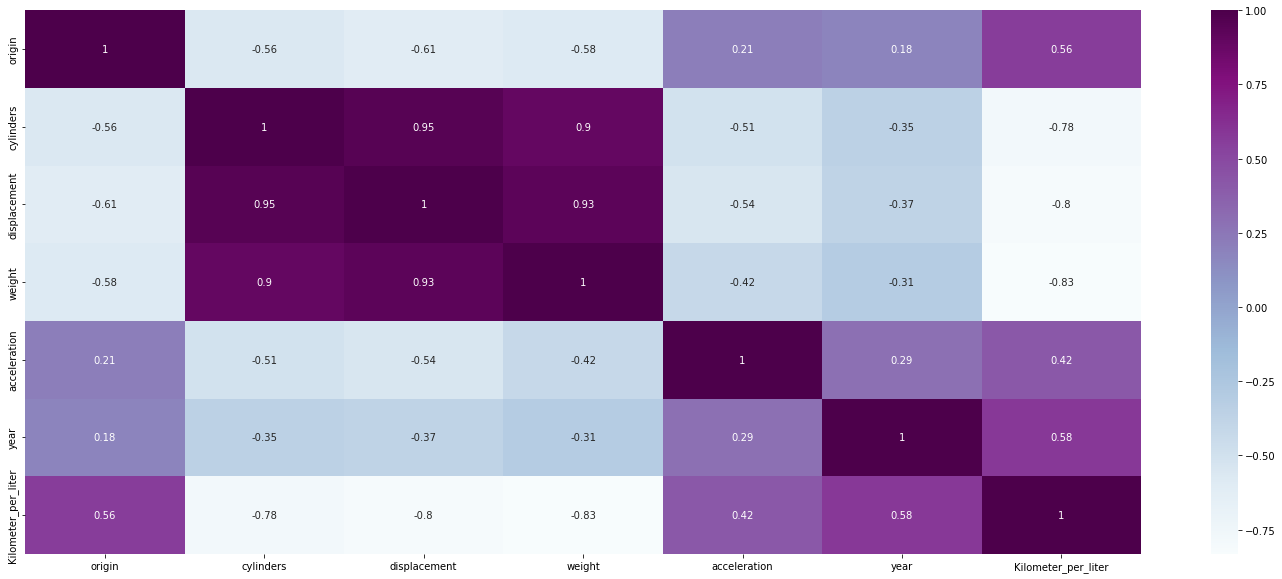

In [20]:
plt.figure(figsize=(25,10))

sns.heatmap(corr,annot=True,cmap='BuPu')

array([[<AxesSubplot:title={'center':'origin'}>,
        <AxesSubplot:title={'center':'cylinders'}>,
        <AxesSubplot:title={'center':'displacement'}>],
       [<AxesSubplot:title={'center':'weight'}>,
        <AxesSubplot:title={'center':'acceleration'}>,
        <AxesSubplot:title={'center':'year'}>],
       [<AxesSubplot:title={'center':'Kilometer_per_liter'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

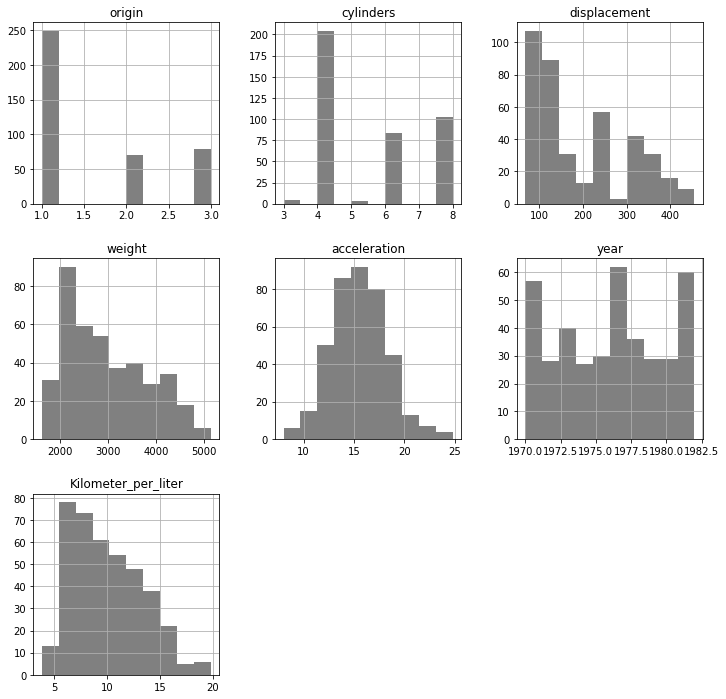

In [21]:
df.hist(figsize=(12,12),color='Grey')

<BarContainer object of 398 artists>

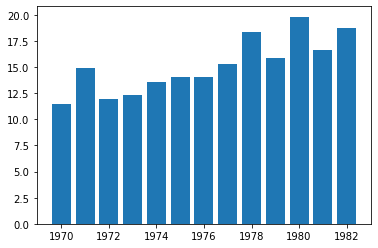

In [22]:
plt.bar(df['year'],df['Kilometer_per_liter'])

In [23]:
df_sort=df.sort_values(by='Kilometer_per_liter',ascending=False)
df_sort.iloc[:,7].head(10)

322                          mazda glc
329                honda civic 1500 gl
325               vw rabbit c (diesel)
394                          vw pickup
326                 vw dasher (diesel)
244    volkswagen rabbit custom diesel
309                          vw rabbit
330               renault lecar deluxe
324                         datsun 210
247                     datsun b210 gx
Name: name, dtype: object

<BarContainer object of 10 artists>

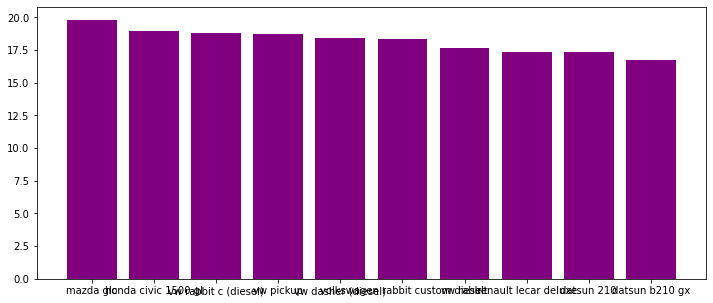

In [25]:
plt.figure(figsize=(12,5))
plt.bar(df_sort['name'].head(10),df_sort['Kilometer_per_liter'].head(10),color='Purple')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

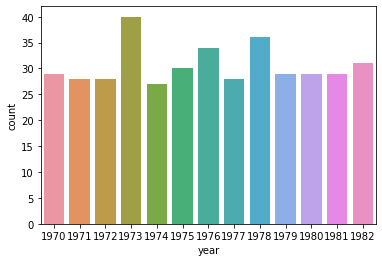

In [26]:
sns.countplot(df['year'])

In [27]:
df['horsepower'].replace('?','0',inplace=True)
df['horsepower']=df['horsepower'].astype('float')

In [29]:
x=df.drop("name",axis=1)
y=df.iloc[:,8]
 

#### Preprocessing

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)

In [31]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

#### SGD Regressor

In [32]:
from sklearn.linear_model import SGDRegressor
regressor=SGDRegressor()
regressor.fit(x_train,y_train)

SGDRegressor()

In [33]:
y_pred=regressor.predict(x_test)

In [37]:
from sklearn.metrics import mean_squared_error,r2_score
accuarcy_score = r2_score(y_test,y_pred)
error_rate = mean_squared_error(y_test,y_pred)

In [38]:
df=pd.DataFrame()
df["Model"]=["Accuracy","Error Rate"]
df["Values"]=[accuarcy_score,error_rate]
df

,Model,Values
0,Accuracy,0.998746
1,Error Rate,0.013042


<BarContainer object of 2 artists>

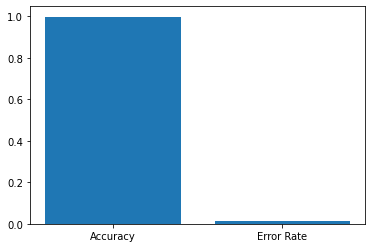

In [39]:
plt.bar(x=df["Model"],height=df["Values"])